In [3]:
# Importing the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data set
plt.style.use('ggplot')
df=pd.read_csv('C:\\Users\\hewlett\\Desktop\\Plant_Tree_data.csv')
df.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
# Spliting the dataset
df.shape
x=df.drop('TreeType',axis=1).values
y=df['TreeType'].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42,stratify=y)

In [7]:
# Trainig the model
from sklearn.neighbors import KNeighborsClassifier
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
train_accuracy[i]=knn.score(x_train,y_train)
test_accuracy[i]=knn.score(x_test,y_test)

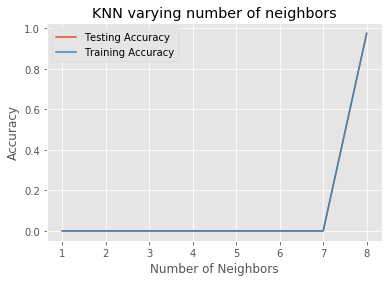

In [8]:
# Plot the accuracy
plt.title('KNN varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Accuracy")
plt.show()

In [9]:
# Fitting the model for observed k (k=7)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
knn.score(x_test,y_test)

0.9756983240223464

NameError: name 'y_pred_proba' is not defined